# PCA MODEL

---



The project aims to develop an early disease detection system for patients with medical conditions using machine learning techniques applied to datasets sourced from Kaggle.com.


PCA (Principal Component Analysis) is a powerful technique employed for both clustering and dimensionality reduction purposes. By applying PCA, we can effectively transform high-dimensional data into a lower-dimensional representation, capturing the most significant patterns and variations in the data. This reduction in dimensionality not only simplifies the data but also helps in visualizing and understanding complex relationships between data points.

The aims is to achieve early detection of diseases in patients with medical conditions using data from Kaggle.com datasets. Also this will be availabe in the next repository:

This dataset was modified only to use a population sector between the ages of 15 and 75 years, therefore the results may vary if you wish to use the same dataset in other programs.

https://github.com/CarlosLeonel89/IA-ML-PROJECT-Detection-Disease

---



# DIABETES

Dataset source: [Kaggle Diabetes Dataset](https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset)

##About this Dataset:
The **Diabetes prediction dataset** is a collection of medical and demographic data from patients, along with their diabetes status (positive or negative). The data includes features such as age, gender, body mass index (BMI), hypertension, heart disease, smoking history, HbA1c level, and blood glucose level. This dataset can be used to build machine learning models to predict diabetes in patients based on their medical history and demographic information.

This can be useful for healthcare professionals in identifying patients who may be at risk of developing diabetes and in developing personalized treatment plans. Additionally, the dataset can be used by researchers to explore the relationships between various medical and demographic factors and the likelihood of developing diabetes.


##Features

*   **Gender**: Gender refers to the biological sex of the individual, which can have an impact on their susceptibility to diabetes.

*   **Age**: Age is an important factor as diabetes is more commonly diagnosed in older adults.Age ranges from 0-80 in our dataset.

*   **Hypertension**: Hypertension is a medical condition in which the blood pressure in the arteries is persistently elevated.

*   **Heart Disease**: Heart disease is another medical condition that is associated with an increased risk of developing diabetes.

*   **Smoking History**: Smoking history is also considered as a risk factor on Diabetes. It represents smoking history of the patient.

*   **BMI(Body Mass Index)**: BMI (Body Mass Index) is a measure of body fat based on weight and height. Patients with higher BMI are known for having more risk of suffering from diabetes.

*   **HbA1c Level**: HbA1c (Hemoglobin A1c) level is a measure of a person's average blood sugar level over the past 2-3 months.

*   **Blood Glucose Level**: Blood glucose level refers to the amount of glucose in the bloodstream at a given time.

*   **Diabetes**: Represents the patient if he/she has diabetes or not. 0 is negative, 1 is positive.


---



# CODE & GRAPHS

## Import libraries


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")
import os as os
from sklearn.model_selection import train_test_split
from pathlib import Path
import tarfile
import urllib.request
import urllib
from matplotlib_inline.backend_inline import set_matplotlib_formats
import seaborn as sns

Importing & downloading information from the datasets:

In [ ]:
def load_diabetes_data():
    tarball_path = Path("datasets/diabetes_prediction_dataset_15-75.csv")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = 'https://raw.githubusercontent.com/CarlosLeonel89/IA-ML-PROJECT-Detection-Disease/main/datasets/diabetes/diabetes_prediction_dataset_15-75.csv'
        urllib.request.urlretrieve(url, tarball_path)
    return pd.read_csv(tarball_path)

diabetes = load_diabetes_data()

Read the information of the datasets:

In [ ]:
df = pd.read_csv('datasets/diabetes_prediction_dataset_15-75.csv')

Print all the information of the dataset:

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,54,0,0,No Info,27.32,6.6,80,0
1,Male,28,0,0,never,27.32,5.7,158,0
2,Female,36,0,0,current,23.45,5.0,155,0
3,Female,20,0,0,never,27.32,6.6,85,0
4,Female,44,0,0,never,19.31,6.5,200,1


In [ ]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,77402.000000,77402.000000,77402.000000,77402.000000,77402.000000,77402.000000,77402.000000
mean,44.297693,0.076019,0.033345,28.639308,5.532438,138.350068,0.088602
std,16.388358,0.265030,0.179538,6.216365,1.073837,40.972084,0.284171
min,15.000000,0.000000,0.000000,10.080000,3.500000,80.000000,0.000000
25%,30.000000,0.000000,0.000000,25.390000,4.800000,100.000000,0.000000
50%,45.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,58.000000,0.000000,0.000000,30.790000,6.200000,159.000000,0.000000
max,75.000000,1.000000,1.000000,95.220000,9.000000,300.000000,1.000000


The `.described` method returns statistical information of the dataframe or series data (in fact, this method returns a dataframe). This information includes the number of samples, the mean value, the standard deviation, the minimum value, the maximum value, the median and the values corresponding to the 25% and 75% percentiles.

In [ ]:
df.corr()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
age,1.000000,0.223849,0.200236,0.151079,0.103544,0.107970,0.244767
hypertension,0.223849,1.000000,0.100407,0.139409,0.082704,0.085558,0.192416
heart_disease,0.200236,0.100407,1.000000,0.051939,0.064210,0.070414,0.165694
bmi,0.151079,0.139409,0.051939,1.000000,0.082933,0.090924,0.209450
HbA1c_level,0.103544,0.082704,0.064210,0.082933,1.000000,0.169089,0.407260
blood_glucose_level,0.107970,0.085558,0.070414,0.090924,0.169089,1.000000,0.423455
diabetes,0.244767,0.192416,0.165694,0.209450,0.407260,0.423455,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77402 entries, 0 to 77401
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               77402 non-null  object 
 1   age                  77402 non-null  int64  
 2   hypertension         77402 non-null  int64  
 3   heart_disease        77402 non-null  int64  
 4   smoking_history      77402 non-null  object 
 5   bmi                  77402 non-null  float64
 6   HbA1c_level          77402 non-null  float64
 7   blood_glucose_level  77402 non-null  int64  
 8   diabetes             77402 non-null  int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 5.3+ MB


The .`info` method displays a summary of a dataframe, including information about the type of row and column indexes, non-null values and memory used.

In [ ]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

The last method analyze and return `True` for missing components and `False` for non-missing cells. However, when the dimension of a dataset is large, it could be difficult to figure out the existence of missing values.

In [ ]:
#Line of code to drop duplicate data
df = df.drop_duplicates()

In [ ]:
df.diabetes.value_counts(normalize = True).mul(100)

0    90.828905
1     9.171095
Name: diabetes, dtype: float64


This parameter of the `value_counts()` function normalizes the counts, dividing each count by the total number of values in the column. This converts the counts into proportions or percentages. It returns a Series where the unique values are the index labels, and the corresponding values are the percentages of each value in the column.

In [ ]:
df['diabetes'].value_counts()

0    67861
1     6852
Name: diabetes, dtype: int64

In [ ]:
pd.crosstab(df.gender, df.diabetes, margins = True)

diabetes,0,1,All
gender,,,
Female,41371,3531,44902
Male,26476,3321,29797
Other,14,0,14
All,67861,6852,74713


By combining all these parts, the code calculates a cross-tabulation table between the "gender" and "diabetes" columns in the DataFrame `df`. The resulting table shows the frequency count of each unique combination of values between these two variables.

In [ ]:
#Average age of participant
df['age'].mean()

44.444755263474896

# Graphs

In [ ]:
con_cols = [x for x in df.dtypes.index if df.dtypes[x] != 'object']

 `con_cols` will contain a list of column names that have a data type different from `object`, i.e., those columns that do not contain string data or mixed data.

In [ ]:
zero_per = df['diabetes'].value_counts(normalize = True).mul(100)[0]
one_per = df['diabetes'].value_counts(normalize = True).mul(100)[1]

print(zero_per)
print(one_per)

90.82890527752868
9.171094722471324


 The code calculates the percentage of occurrences for each unique value (0 and 1) in the `diabetes` column of the DataFrame `df` and prints the resulting percentages. It can be used to understand the distribution of the `diabetes` variable in the dataset.



---



The next code is jut to create a graph that will show a bar chart with two bars, representing the count of occurrences for each class ('0' and '1') of the `diabetes` variable in the DataFrame `df`. The percentage of each class will be displayed as text labels above their respective bars.

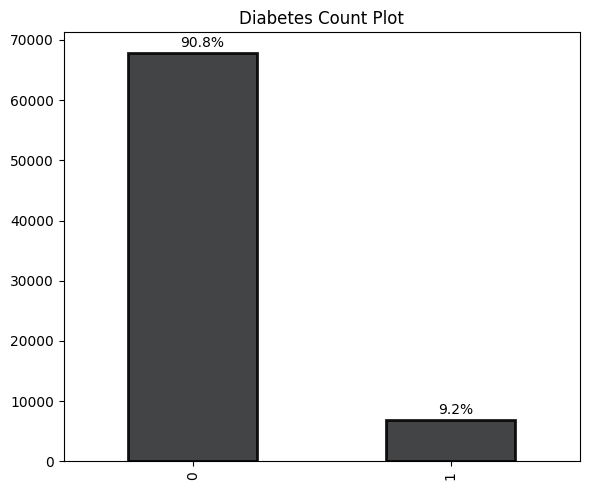

In [ ]:
fig = plt.figure(figsize = (6,5))

zero_per = df['diabetes'].value_counts(normalize = True).mul(100)[0] #getting percentage of 0 class
one_per = df['diabetes'].value_counts(normalize = True).mul(100)[1]  #getting percentage of 1 class

ax = df['diabetes'].value_counts().plot(kind = 'bar', color = '#2E2F32', edgecolor = 'k', linewidth = 2, alpha = 0.9)

ax.text(ax.patches[0].get_x() + 0.2 ,ax.patches[0].get_height() + 1000, f"{round(zero_per, 1)}%", fontsize = 10 ) #writing zero percentage to plot
ax.text(ax.patches[1].get_x() + 0.2 ,ax.patches[1].get_height() + 1000, f"{round(one_per, 1)}%", fontsize = 10 )  #writing one percentage to plot

plt.title("Diabetes Count Plot")


plt.tight_layout()
plt.show()

As you can see the percentages that we got in the chart is corresponding to the results of the last code:

```
zero_per = df['diabetes'].value_counts(normalize = True).mul(100)[0]
one_per = df['diabetes'].value_counts(normalize = True).mul(100)[1]

print(zero_per)
print(one_per)

```

In this case we got a 90.8% of negatives results & 9.8% of positives results.


The next code sets up a directory for saving high-resolution PNG images, defines a function to save figures with customizable parameters, sets default font sizes for plots, creates and saves a histogram plot of the "diabetes" object, and displays the plot on the screen.

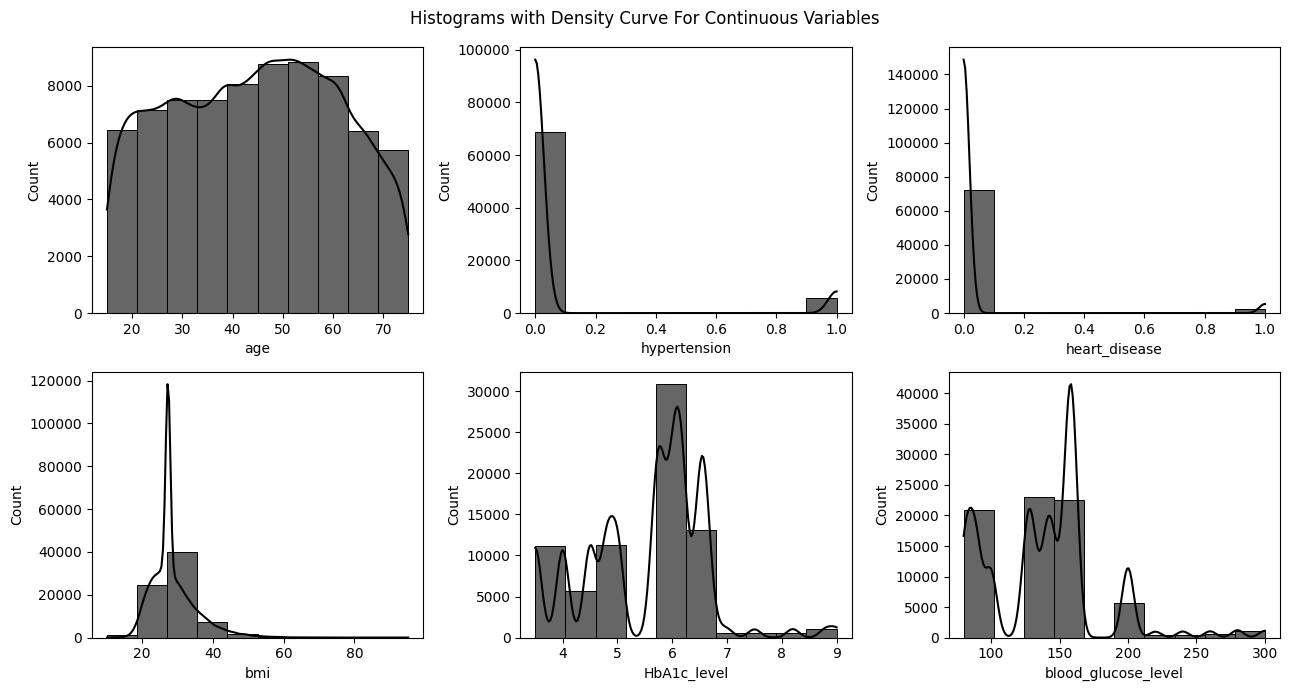

In [ ]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (13, 7))

for i, ax in enumerate(axes.flatten()):
    sns.histplot(df[con_cols[i]], bins = 10, kde = True, ax = ax, color = "black", edgecolor = 'k', linewidth = 0.7, alpha = 0.6)
fig.suptitle("Histograms with Density Curve For Continuous Variables")
plt.tight_layout()
plt.show()

The last code creates a 2x3 grid of subplots using `plt.subplots()` with a figure size of (13, 7). It then plots histograms with density curves for continuous variables present in the DataFrame `df`. The loop iterates through each subplot in the flattened `axes` array and plots a histogram for the corresponding column in `df`.

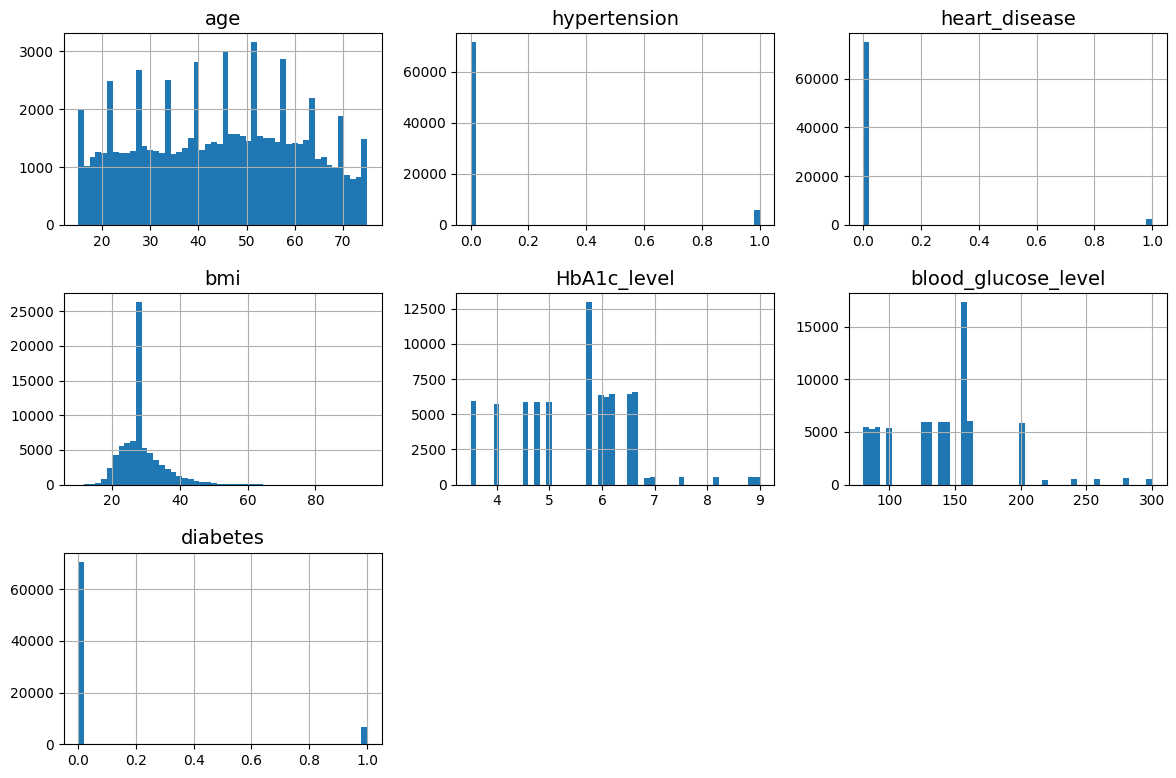

In [ ]:
 # extra code – code to save the figures as high-res PNGs for the book

IMAGES_PATH = Path() / "images" / "end_to_end_project"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

diabetes.hist(bins=50, figsize=(12, 8))
save_fig("attribute_histogram_plots")  # extra code
plt.show()

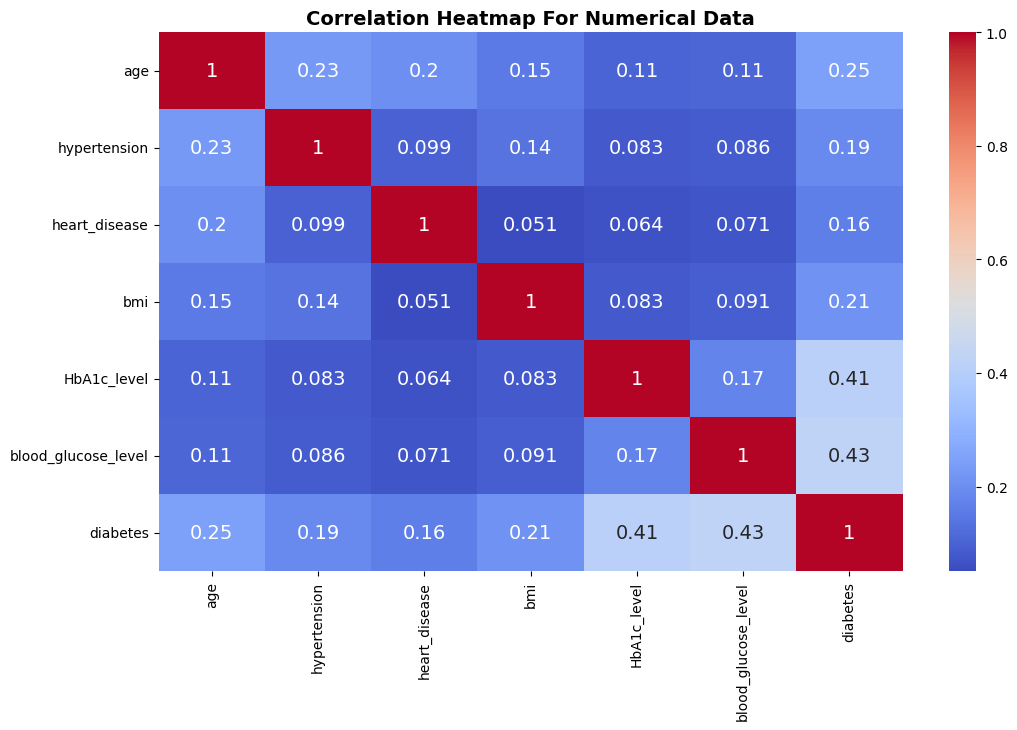

In [ ]:
plt.figure(figsize = (12,7))
sns.heatmap(df[con_cols].corr(), annot = True, cmap = 'coolwarm')
plt.title("Correlation Heatmap For Numerical Data", fontsize = '14', fontweight= 'bold')
plt.show()

This code generates a heatmap visualization to show the correlation between numerical columns in the DataFrame `df` using Seaborn's heatmap function. The plot displays the correlation coefficients as colors, making it easier to identify patterns and relationships between the numerical variables.

# Create a Test Set

In [ ]:
#Creating dummies for categorical variables
from sklearn.preprocessing import LabelEncoder
create_dummies=df.copy()
le=LabelEncoder()
le.fit_transform(create_dummies["gender"])
create_dummies["Gender_code"]=le.fit_transform(create_dummies["gender"])
create_dummies.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,Gender_code
0,Female,54,0,0,No Info,27.32,6.6,80,0,0
1,Male,28,0,0,never,27.32,5.7,158,0,1
2,Female,36,0,0,current,23.45,5.0,155,0,0
3,Female,20,0,0,never,27.32,6.6,85,0,0
4,Female,44,0,0,never,19.31,6.5,200,1,0


The provided code performs the creation of dummy variables for categorical variables using the scikit-learn `(sklearn)` library. First, the LabelEncoder class is imported, which will be used to convert text labels to numeric values. Then, a copy of the original DataFrame named `'create_dummies'` is created to avoid modifying the original data. The LabelEncoder is instantiated and fit to the 'gender' column of the copied DataFrame using the fit_transform function, which encodes categorical labels into numeric values. Next, a new column is created in the DataFrame 'create_dummies' named `'Gender_code'` and assigned the encoded numeric values obtained by a new call to the LabelEncoder in the 'gender' column. Finally, a preview of the DataFrame is shown with the new 'Gender_code' column, which now contains the numeric encodings of the categorical variable 'gender'. In summary, this code allows transforming a categorical variable into numerical values for further use in machine learning analysis and models.

In [ ]:
create_dummies["Smoking_code"]=le.fit_transform(create_dummies["smoking_history"])
create_dummies.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,Gender_code,Smoking_code
0,Female,54,0,0,No Info,27.32,6.6,80,0,0,0
1,Male,28,0,0,never,27.32,5.7,158,0,1,4
2,Female,36,0,0,current,23.45,5.0,155,0,0,1
3,Female,20,0,0,never,27.32,6.6,85,0,0,4
4,Female,44,0,0,never,19.31,6.5,200,1,0,4


In this continuation of the code, another transformation of categorical variables is performed using the LabelEncoder. A new column is created in the DataFrame `create_dummies` called `"Smoking_code"`. Then, the LabelEncoder is applied to the "smoking_history" column of the DataFrame, and the encoded numeric values are assigned to the new "Smoking_code" column. This column now contains the numeric encodings for the categorical variable "smoking_history". When displaying a preview of the DataFrame create_dummies, both the "Gender_code" column with the numeric encodings for "gender" and the new "Smoking_code" column with the numeric encodings for "smoking_history" can be observed. These numerical encodings are useful for analysis and machine learning models, as they allow working with categorical variables in numerical format.


In [ ]:
df2 = create_dummies

In [ ]:
df2.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,Gender_code,Smoking_code
0,Female,54,0,0,No Info,27.32,6.6,80,0,0,0
1,Male,28,0,0,never,27.32,5.7,158,0,1,4
2,Female,36,0,0,current,23.45,5.0,155,0,0,1
3,Female,20,0,0,never,27.32,6.6,85,0,0,4
4,Female,44,0,0,never,19.31,6.5,200,1,0,4


In [ ]:
#Droping categorical variable after converting them into numerical code
data = df2.drop(['gender', 'smoking_history'], axis=1)

In this code fragment, after converting the categorical variables into numeric codes using the `LabelEncoder`, the original columns 'gender' and 'smoking_history' are removed from the DataFrame `'df2'`. The resulting DataFrame, named `'data'`, now contains only the numeric variables and no longer includes the categorical columns. This is achieved by using the drop function, specifying `axis=1` to indicate that columns should be removed. By doing this, only the numerical variables relevant for analysis or for building machine learning models are retained. The removal of categorical variables is useful because many machine learning algorithms require numerical data as input, and by converting categorical variables to numerical codes and then removing the original columns, one can more efficiently and effectively work with the data for model building and further analysis.

In [ ]:
data.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,Gender_code,Smoking_code
0,54,0,0,27.32,6.6,80,0,0,0
1,28,0,0,27.32,5.7,158,0,1,4
2,36,0,0,23.45,5.0,155,0,0,1
3,20,0,0,27.32,6.6,85,0,0,4
4,44,0,0,19.31,6.5,200,1,0,4


In [ ]:
X=data.drop(['diabetes'],axis=1)   #Input
y=data['diabetes']     #Output

In this code, the features `(predictor variables)` and the target variable `(output variable)` of the DataFrame `'data'` are separated for use in a machine learning model.

'X' is a new DataFrame containing all columns of `'data'` except the 'diabetes' column. The 'diabetes' column is removed using the drop function with `axis=1`.

'y' is a series containing only the 'diabetes' column of the 'data' DataFrame. It represents the target variable that we want to predict with our machine learning model.

By separating the data in this way, 'X' will contain the features that the model will use to make predictions, and 'y' will contain the expected responses to compare with the model's predictions during training and evaluation.

In [ ]:
X.shape

(74713, 8)

The `X.shape` expression returns a tuple containing two values: the number of rows and the number of columns in the DataFrame or array `'X'`. The shape of an array or DataFrame can be understood as the dimension or structure of the data.

For example, if the result of `X.shape` is `(100, 5)`, it means that 'X' has 100 rows and 5 columns. This indicates that 'X' contains 100 records or examples, and each record has 5 features or predictor variables.

The shape of the DataFrame or matrix 'X' is useful information for understanding the structure of the data and is essential when performing operations and analysis on the data, especially in the context of machine learning models.

In [ ]:
#Standardising
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [ ]:
X_std

array([[ 0.58220019, -0.29224711, -0.18916031, ..., -1.42161978,
        -0.81449055, -1.3556734 ],
       [-1.00197744, -0.29224711, -0.18916031, ...,  0.47330379,
         1.22584583,  0.85360171],
       [-0.51453817, -0.29224711, -0.18916031, ...,  0.40042212,
        -0.81449055, -0.80335462],
       ...,
       [ 1.3133591 , -0.29224711, -0.18916031, ...,  0.40042212,
         1.22584583,  0.30128293],
       [-1.24569708, -0.29224711, -0.18916031, ..., -0.93574194,
        -0.81449055,  0.85360171],
       [ 0.76498992, -0.29224711, -0.18916031, ..., -1.17868086,
        -0.81449055, -0.80335462]])

# Principal Component Analysis(PCA)

In [ ]:
mean_vec = np.mean(X_std, axis =0)

In [ ]:
mean_vec

array([ 8.27395741e-17,  5.11178403e-18,  2.68190344e-17,  6.31959161e-16,
       -2.45199203e-16, -4.56494202e-18, -5.49219587e-17, -5.56352309e-17])

In [ ]:
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print("Covariance matrix \n%s" %cov_mat)

Covariance matrix 
[[ 1.00001338  0.22500781  0.20194307  0.1516852   0.1059092   0.10974032
   0.04271405  0.03998402]
 [ 0.22500781  1.00001338  0.09878384  0.13764988  0.08298181  0.08568705
   0.03662911  0.05559687]
 [ 0.20194307  0.09878384  1.00001338  0.05059578  0.06446416  0.07061355
   0.09176801 -0.00502341]
 [ 0.1516852   0.13764988  0.05059578  1.00001338  0.08335054  0.09122883
   0.01622949  0.05176353]
 [ 0.1059092   0.08298181  0.06446416  0.08335054  1.00001338  0.17426199
   0.02751688  0.02119949]
 [ 0.10974032  0.08568705  0.07061355  0.09122883  0.17426199  1.00001338
   0.02487817  0.02058439]
 [ 0.04271405  0.03662911  0.09176801  0.01622949  0.02751688  0.02487817
   1.00001338 -0.06012027]
 [ 0.03998402  0.05559687 -0.00502341  0.05176353  0.02119949  0.02058439
  -0.06012027  1.00001338]]


Text(0.5, 1.0, 'Correlation between different features')

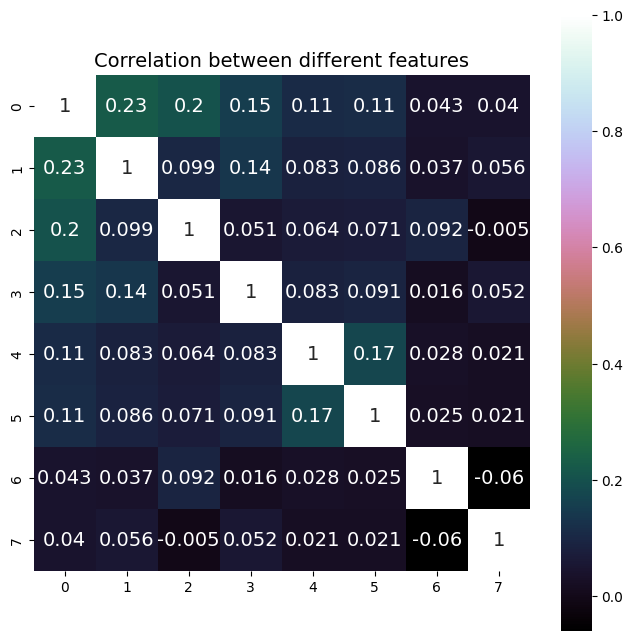

In [ ]:
plt.figure (figsize=(8,8))
sns.heatmap(cov_mat, vmax=1, square =True, annot = True, cmap='cubehelix')
plt.title('Correlation between different features')

In [ ]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print("Eigenvectors \n%s" %eig_vecs)
print("Eigenvectors \n%s" %eig_vals)

Eigenvectors 
[[ 0.51011006  0.77333997  0.04846287 -0.27628564 -0.01921845 -0.04735911
   0.24179472  0.04442628]
 [ 0.44070118 -0.43537567 -0.09266098 -0.30451252  0.09745432 -0.67819468
   0.04650685 -0.20810648]
 [ 0.36508215 -0.42817869  0.38574589 -0.22486638 -0.0581631   0.41825088
   0.25185528  0.49220467]
 [ 0.36609502 -0.13164007 -0.23414183 -0.09932773 -0.09506428  0.5690292
  -0.19594669 -0.64244095]
 [ 0.34518705 -0.03332135 -0.08955932  0.60605232 -0.68432188 -0.1493516
  -0.01624035  0.11640114]
 [ 0.35508377 -0.00911747 -0.09263901  0.58707183  0.7128739   0.06196307
   0.02169267  0.08998822]
 [ 0.14447845  0.10093042  0.63388885  0.01752303  0.03345074 -0.09984673
  -0.74448228 -0.03840181]
 [ 0.11021371  0.01862322 -0.60582594 -0.24134557  0.01041929  0.05446441
  -0.53156189  0.52592811]]
Eigenvectors 
[1.61658963 0.73638767 1.09770941 1.03361618 0.8250276  0.8506849
 0.91402865 0.92606304]


In [ ]:
eig_pairs = [(np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]
eig_pairs.sort(key=lambda x: x[0], reverse=True)
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
1.616589631865892
1.0977094111746106
1.0336161773030241
0.9260630386238584
0.9140286476157385
0.8506849033589056
0.8250276020728808
0.73638766583069


In [ ]:
tot = sum(eig_vals)
var_exp = [(i/100)*100 for i in sorted(eig_vals,reverse= True)]

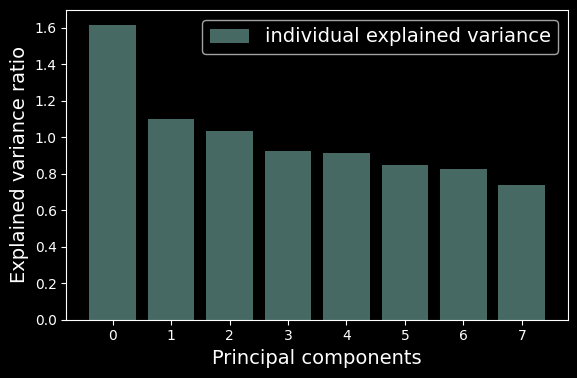

In [ ]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(8), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

Empieza el trainning

In [ ]:
from sklearn.decomposition import PCA
sklearn_pca = PCA(n_components=6) #change components to get optimum accuracy
X_New = sklearn_pca.fit_transform(X_std)

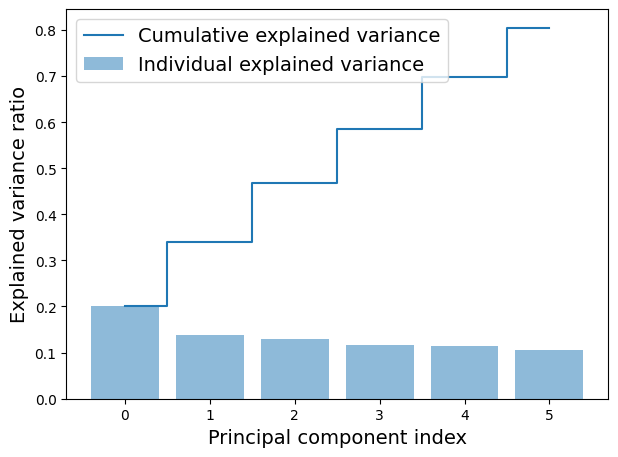

In [ ]:
exp_var_pca=sklearn_pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center',
        label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',
         label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_New,y,test_size=0.2,random_state =0)

In [ ]:

X_train

array([[ 0.01157685,  0.71563574,  0.10578257, -0.44314878,  0.9483107 ,
        -0.52619831],
       [-0.88738951,  0.46721137,  0.12134795,  0.50258943, -1.43679363,
         0.07460556],
       [ 0.8845998 , -1.43243719,  0.88317004,  0.78731661,  0.04418627,
         1.17946792],
       ...,
       [-0.23361271, -1.08710128, -0.3965931 , -0.67689349, -0.08446926,
         0.09168321],
       [-0.1823468 , -0.13663133, -0.72319915,  0.1970885 ,  2.01330102,
         0.48729184],
       [-1.08761126, -0.10930626, -0.03887752,  0.72463163, -0.65076143,
         0.22680767]])

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state =0)
classifier.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [ ]:
y_pred = classifier.predict(X_test)
print(y_pred)

[0 0 0 ... 0 0 0]


In [ ]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test,y_pred)
print(cm)

[[13409   130]
 [  558   846]]


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9539583751589373

# Conclusion - It gives optimum accuracy of 95.953%.